Convert txt file to CSV:

In [5]:
import pandas as pd

#sample data in dic format

data = {
    "Date": [
         "2023-01-01", "2023-01-01", "2023-01-02", "2023-01-02",
        "2023-01-03", "2023-01-03", "2023-01-04", "2023-01-05",
        "2023-01-05", "2023-01-06", "2023-01-06", "2023-01-07",
        "2023-01-07", "2023-01-08", "2023-01-08"
    ],
    "Product": [
        "Widget A", "Widget B", "Widget A", "Widget C", 
        "Widget A", "Widget B", "Widget C", "Widget A", 
        "Widget B", "Widget D", "Widget E", "Widget A", 
        "Widget C", "Widget D", "Widget B"
    ],
    "Quantity": [
        10, 5, 8, 3, 15, None, 7, 10, 10, 5, 3, 12, 6, 8, 10
    ],
     "Price": [
        15.5, 20.0, 15.5, 25.0, None, 20.0, 25.0, 15.5, 
        20.0, 30.0, 40.0, 15.5, 25.0, 30.0, 20.0
    ],

}

#convert dictionary to DataFrame
df = pd.DataFrame(data)

#save DataFrame to csv
df.to_csv("sales_data.csv", index=False)
print("Data saved to 'sales_data.csv'")

Data saved to 'sales_data.csv'


Sales Data Processing 

Step 1: Data Ingestion

In [7]:
import pandas as pd

#load data from csv
data = pd.read_csv("sales_data.csv")

#Display the data
print(data)

          Date   Product  Quantity  Price
0   2023-01-01  Widget A      10.0   15.5
1   2023-01-01  Widget B       5.0   20.0
2   2023-01-02  Widget A       8.0   15.5
3   2023-01-02  Widget C       3.0   25.0
4   2023-01-03  Widget A      15.0    NaN
5   2023-01-03  Widget B       NaN   20.0
6   2023-01-04  Widget C       7.0   25.0
7   2023-01-05  Widget A      10.0   15.5
8   2023-01-05  Widget B      10.0   20.0
9   2023-01-06  Widget D       5.0   30.0
10  2023-01-06  Widget E       3.0   40.0
11  2023-01-07  Widget A      12.0   15.5
12  2023-01-07  Widget C       6.0   25.0
13  2023-01-08  Widget D       8.0   30.0
14  2023-01-08  Widget B      10.0   20.0


tep 2: Data Cleaning

In [8]:
#check for missing values

print(data.isnull().sum())

#Fill missing  'Quantity' with 0, 'Price' with mean, and drop rows with missing 'Date' or 'Product'
data['Quantity'].fillna(0, inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)
data.dropna(subset=['Date','Product'], inplace=True)

#Remove duplicates
data.drop_duplicates(inplace=True)

#Verify the cleaning
print(data.isnull().sum())


Date        0
Product     0
Quantity    1
Price       1
dtype: int64
Date        0
Product     0
Quantity    0
Price       0
dtype: int64


C:\Users\hmdkr\AppData\Local\Temp\ipykernel_10028\1428300258.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity'].fillna(0, inplace=True)
C:\Users\hmdkr\AppData\Local\Temp\ipykernel_10028\1428300258.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Step 3: Data Transformation

In [9]:
#Create a new coulmn for Total sales

data['Total_Sales'] = data['Quantity'] * data['Price']

#Display the transformed data
print(data)

          Date   Product  Quantity      Price  Total_Sales
0   2023-01-01  Widget A      10.0  15.500000   155.000000
1   2023-01-01  Widget B       5.0  20.000000   100.000000
2   2023-01-02  Widget A       8.0  15.500000   124.000000
3   2023-01-02  Widget C       3.0  25.000000    75.000000
4   2023-01-03  Widget A      15.0  22.642857   339.642857
5   2023-01-03  Widget B       0.0  20.000000     0.000000
6   2023-01-04  Widget C       7.0  25.000000   175.000000
7   2023-01-05  Widget A      10.0  15.500000   155.000000
8   2023-01-05  Widget B      10.0  20.000000   200.000000
9   2023-01-06  Widget D       5.0  30.000000   150.000000
10  2023-01-06  Widget E       3.0  40.000000   120.000000
11  2023-01-07  Widget A      12.0  15.500000   186.000000
12  2023-01-07  Widget C       6.0  25.000000   150.000000
13  2023-01-08  Widget D       8.0  30.000000   240.000000
14  2023-01-08  Widget B      10.0  20.000000   200.000000


Step 4: Data Analysis

In [10]:
#Group by product and sum up total sales
product_sales = data.groupby('Product')['Total_Sales'].sum().reset_index()

#Display the sales per product
print(product_sales)

    Product  Total_Sales
0  Widget A   959.642857
1  Widget B   500.000000
2  Widget C   400.000000
3  Widget D   390.000000
4  Widget E   120.000000


Visualize the total sales per product

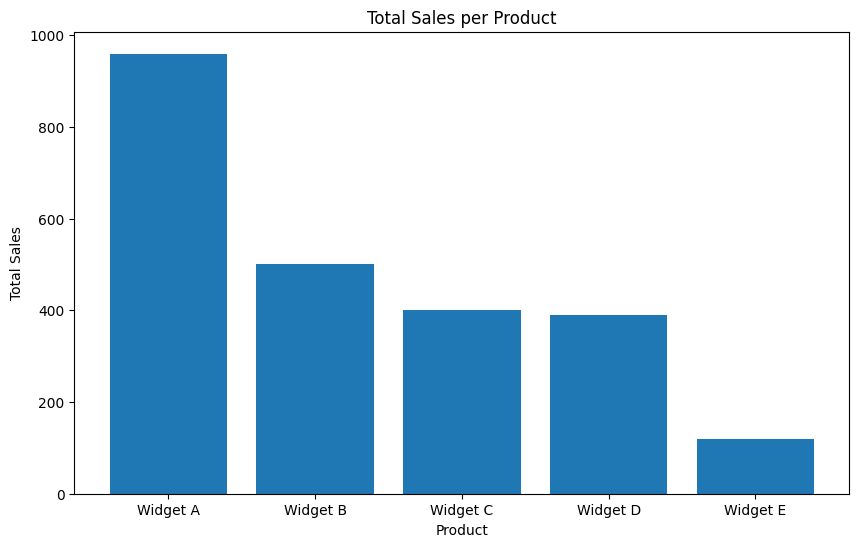

In [11]:
import matplotlib.pyplot as plt 

#Plot total sales per product
plt.figure(figsize=(10, 6))
plt.bar(product_sales['Product'], product_sales['Total_Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.show()

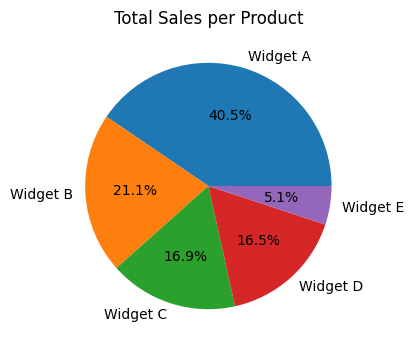

In [12]:
# create a pie chart of total sales per product
plt.figure(figsize=(6, 4))
plt.pie(product_sales['Total_Sales'], labels=product_sales['Product'], autopct='%1.1f%%')
plt.title('Total Sales per Product')
plt.show()

Step 5: Save the Cleaned Data

In [ ]:
#Save the cleaned and processed data to a new csv file

data.to_csv("cleand_sales_data.csv", index=False)

print("Data saved to cleaned_sales_data.csv")

Data saved to cleaned_sales_data.csv
